# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format) 

In [3]:
# Уберем параметр максимального числа столбцов, что бы наглядно видеть все данные
pd.set_option('display.max_columns', None)

In [4]:
# Создаем исходный датафрейм, смотрим, что он из себя представляяет
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df1 = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23170,14,"2,700,000.00",32.00,2016-06-20T00:00:00,1,nan,4.00,19.00,2,False,False,False,6.00,0.00,Гатчина,nan,nan,nan,nan,nan,nan,221.00
1510,4,"4,350,000.00",46.00,2017-06-16T00:00:00,1,2.60,16.00,20.00,13,NaN,False,False,13.50,1.00,Санкт-Петербург,"25,987.00","14,195.00",1.00,389.00,0.00,nan,218.00
18237,0,"4,000,000.00",54.00,2017-11-09T00:00:00,2,nan,14.00,nan,14,NaN,False,False,nan,nan,Санкт-Петербург,"51,954.00","17,067.00",1.00,"1,064.00",3.00,224.00,144.00
14160,19,"5,049,998.00",35.50,2018-04-30T00:00:00,1,3.00,16.00,15.60,14,NaN,False,False,8.70,nan,Санкт-Петербург,"12,960.00","12,342.00",1.00,498.00,1.00,128.00,138.00
23067,8,"600,000.00",31.80,2019-04-24T00:00:00,1,nan,2.00,20.00,1,NaN,False,False,7.00,nan,деревня Коркино,nan,nan,nan,nan,nan,nan,nan
13208,3,"2,900,000.00",36.00,2017-02-07T00:00:00,1,2.50,10.00,16.00,6,NaN,False,False,10.00,nan,Всеволожск,nan,nan,nan,nan,nan,nan,770.00
20424,4,"5,925,657.00",93.70,2015-03-10T00:00:00,3,2.75,24.00,47.40,16,False,False,False,16.40,0.00,Санкт-Петербург,"22,219.00","17,547.00",0.00,nan,1.00,144.00,977.00
16283,20,"3,600,000.00",60.30,2018-02-13T00:00:00,2,nan,3.00,41.30,2,NaN,False,False,7.80,nan,городской посёлок Виллози,nan,nan,nan,nan,nan,nan,126.00
3384,16,"4,350,000.00",41.90,2018-07-27T00:00:00,2,2.50,5.00,27.40,5,NaN,False,False,5.80,nan,Санкт-Петербург,"41,919.00","14,424.00",1.00,275.00,0.00,nan,185.00
16315,15,"2,350,000.00",61.00,2018-02-12T00:00:00,4,nan,5.00,53.00,3,NaN,False,False,6.00,nan,Волхов,nan,nan,nan,nan,nan,nan,nan


In [5]:
# Посмотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
# Немнго общей описательной статистики для лучшего представления
df.describe()
# Уже можно увидеть некоторые выбросы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Вывод

В данных представлено 23699 строк и 22 столбца со следующей информацией: 

airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
balcony — число балконов;
ceiling_height — высота потолков (м);
cityCenters_nearest — расстояние до центра города (м);
days_exposition — сколько дней было размещено объявление (от публикации до снятия);
first_day_exposition — дата публикации;
floor — этаж;
floors_total — всего этажей в доме;
is_apartment — апартаменты (булев тип);
kitchen_area — площадь кухни в квадратных метрах (м²);
last_price — цена на момент снятия с публикации;
living_area — жилая площадь в квадратных метрах(м²);
locality_name — название населённого пункта;
open_plan — свободная планировка (булев тип);
parks_around3000 — число парков в радиусе 3 км;
parks_nearest — расстояние до ближайшего парка (м);
ponds_around3000 — число водоёмов в радиусе 3 км;
ponds_nearest — расстояние до ближайшего водоёма (м);
rooms — число комнат;
studio — квартира-студия (булев тип);
total_area — площадь квартиры в квадратных метрах (м²);
total_images — число фотографий квартиры в объявлении.

## Предобработка данных

Для начала определимся какая предобработка будет сделана на этом этапе. 

1) В данных много пропусков - нужно восстановить пропуски там, где это возможно
2) Сменить формат данных, где необходимо

Исходя из этого делаем следующий план:
   1) Обработаем пропуски по населенным пунктам - это  важный параметр
   2) Обработаем пропуски по критерию "апартаменты" и "балкон", потому что здесь очень много пропусков
   3) Сменим формат для некоторых столбцов
    
Пропуски по аэропортам, водоемам и паркам не трогаем. Их очень много. Заменить достоверно все нельзя. К тому же это не критичные параметры. Видимо, большая часть продавцов не считает важным это указывать. Возможно, было бы удобнее, что бы эти показатели рассчитывались автоматически системой, исходя из адреса объекта. Пропуски по жилой площади и площади кухни не значительны, особенно учитывая тот факт, что общая площадь нам известна.
Пропуски по высоте потолков нужно заполнить, их много и данным показатель нам пригодится, но оставим его до шага 3 и обработаем там для удобства. Пропуски по времени провисевшего объявления могут значит то, что объект еще не продан, следовательно мы не можем заполнить эти пропуски

In [7]:
# Если пропуск в данных, предпологается, что парк или водоем в границах 3 км отсутствует
df[df['ponds_around3000'].isnull()].count()[0]
df[df['parks_around3000'].isnull()].count()[0]

5518

In [8]:
# Для начала посмотрим на населенные пункты
print(len(df['locality_name'].unique()))
print(df['locality_name'].unique())

365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

Уникальных значений 364, проблем с регистром нет, но могут быть дубли, 
если один населенный пункт прописать как "поселок" или как "поселок городского типа". 
Тут есть нюанс, что могут быть две локации с одинаковым названием, но поиск в гугле результатов не дал, 
считаем, что таких населенных пунктов нет

In [9]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df['locality_name'] = df['locality_name'].str.replace('поселок ', '', regex=True)
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ', '', regex=True)
df['locality_name'] = df['locality_name'].str.replace('городской поселок ', '', regex=True)
print(len(df['locality_name'].unique()))
# Итого количество уникальных значений сократилось до 323

329


In [10]:
df[df['locality_name'].isnull()].count()[0]
# В данных имеется 49 строк без указания населенного пункта, чисто теоретически, можно было бы попытаться их восстановить
# Например, по расстояниям до аэропорта, парков, водоемов, но точность это не гарантирует, 
# 49 строк - это немного, выбросим их
df = df.drop(df[df['locality_name'].isnull()].index)

In [11]:
# Посмотрим на число балконов
df[df['balcony'].isnull()].count()[0]
# Очень много пропусков
# Это может быть связано с тем, что при отсутствии балкона, информация не вводилась
# Приравняем пропуски к нулю
df['balcony'] = df['balcony'].fillna(0)
# Немного смущает максимальное число балконов - 5
df.loc[(df['balcony'] ==5)]
# Возможно, это какие-то элитные квартиры, но пять балконов в однокомнотной квартире 52 метра - это явно ошибка
df = df.drop(df.loc[(df['balcony'] ==5)&(df['rooms'] ==1)].index)
# Слегка почистили даные по балконам. Достоверно делать выводы о других условиях нельзя

In [12]:
# Перейдем к критерию "апартаменты"
df[df['is_apartment'].isnull()].count()[0]
# Считаем, что везде, где признак не проставлен объект не относится к апартаментам
df['is_apartment'] = df['is_apartment'].fillna(False)

In [13]:
# Теперь приведем к нужному формату столбцы
# В первую очередь дату в подходящий формат
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
# Переведем в тип данных int столбцы, где излишняя точность не нужна
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')

Итого обработаны пропуски, приведены типы данных. В датасете еще есть пропуски, много выбросов. Посмотрим на них ближе ниже 

In [14]:
# Заменим пропуски в этажности стредней этажностью для населенного пункта
df['floors_total'] = df['floors_total'].fillna(df.groupby(['locality_name'])['floors_total'].transform('mean'))
df.isnull().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9156
floors_total                0
living_area              1894
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5527
cityCenters_nearest      5504
parks_around3000         5503
parks_nearest           15568
ponds_around3000         5503
ponds_nearest           14551
days_exposition          3177
dtype: int64

## Расчёты и добавление результатов в таблицу

Нужно рассчитать:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [15]:
# Рассчитаем отношения площадей
df['price_for_m'] = (df['last_price']/df['total_area']).round(decimals=2)
df['living/total'] = (df['living_area']/df['total_area']).round(decimals=2)
df['kitchen/total'] = (df['kitchen_area']/df['total_area']).round(decimals=2)

In [16]:
# Напишем функцию для определения категории этажа
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [17]:
# Применяем функцию
df['floor_category'] = df.apply(floors, axis=1)

In [18]:
# Теперь можно добавить столбцы со днем недели, месяцем и годом
df['day_of_week'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,living/total,kitchen/total,floor_category,day_of_week,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,"120,370.37",0.47,0.23,другой,Thursday,March,2019
1,7,3350000,40.40,2018-12-04,1,nan,11.00,18.60,1,False,False,False,11.00,2,Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,"82,920.79",0.46,0.27,первый,Tuesday,December,2018
2,10,5196000,56.00,2015-08-20,2,nan,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",0.61,0.15,другой,Thursday,August,2015
3,0,64900000,159.00,2015-07-24,3,nan,14.00,nan,9,False,False,False,nan,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",nan,nan,другой,Friday,July,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",0.32,0.41,другой,Tuesday,June,2018
5,10,2890000,30.40,2018-09-10,1,nan,12.00,14.40,5,False,False,False,9.10,0,городской Янино-1,nan,nan,nan,nan,nan,nan,55.00,"95,065.79",0.47,0.30,другой,Monday,September,2018
6,6,3700000,37.30,2017-11-02,1,nan,26.00,10.60,6,False,False,False,14.40,1,Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00,"99,195.71",0.28,0.39,другой,Thursday,November,2017
7,5,7915000,71.60,2019-04-18,2,nan,24.00,nan,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan,"110,544.69",nan,0.26,другой,Thursday,April,2019
8,20,2900000,33.16,2018-05-23,1,nan,27.00,15.43,26,False,False,False,8.81,0,Мурино,nan,nan,nan,nan,nan,nan,189.00,"87,454.76",0.47,0.27,другой,Wednesday,May,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00,"88,524.59",0.71,0.11,другой,Sunday,February,2017


## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

12.0
900.0


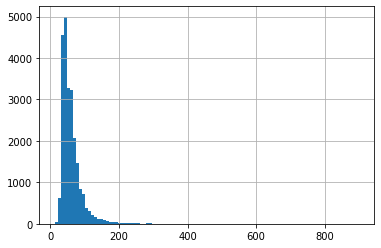

In [19]:
# Начнем с изучения площади. Пропусков в данных нет
df['total_area'].hist(bins=100)
print(df['total_area'].min())
print(df['total_area'].max())
# В целом гистограмма похожа на распределение Пирсона, это хорошо, 
# но минимальное значение 12 и максимальное 900 - это странно

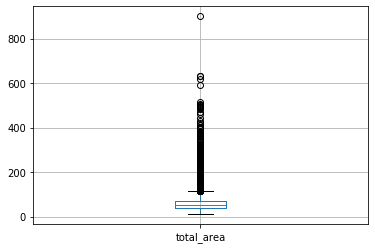

In [20]:
# Посмотрим по графику бокс-плоту
df.boxplot(column='total_area')
# К минимуму нет претензий, а вот сверху много отдельны точек - выбросов
# Попробуем для начала убрать часть, особо выделяющиеся и посмотреть как измениться график

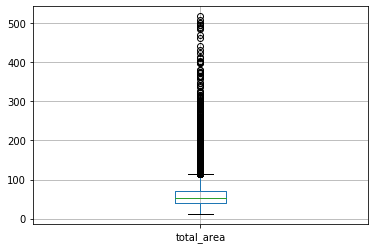

In [21]:
# Удаляем строки с самыми большими выбросами (визуально видно их отдельно лежащие выше примерно значения 550)
df = df.drop(df.loc[(df['total_area'] > 550)].index)
# Смотрим как изменился боксплот
df.boxplot(column='total_area')
# Все точки с большими значениями(больше верхнего квартиля) идут сплошной линией
# Фактически, они являются выбросами, но их трогать не будем
# Их все-таки более существенное количество -
# Они характеризуют выборку - показывают на наличие определенного процента элитной недвижимости

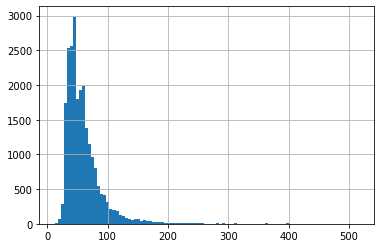

In [22]:
# Постороим гистограмму еще раз
df['total_area'].hist(bins=100)
# Она стала чуть более понятна, за счет "обрезки хвоста"

In [23]:
# Кроме наглядности добавим немного фактов
df['total_area'].describe()

count   23,620.00
mean        60.21
std         34.50
min         12.00
25%         40.00
50%         52.00
75%         69.72
max        517.00
Name: total_area, dtype: float64

Итого, гистограмма близка к распределению Пирсона с малым числом степеней свободы. Можно наблюдать, что большая часть объектов недвижимости находиться в интервале от 40 до 70 кв.м. Среднее значение - 60 кв.м. , однако на него оказыват сильное влияние правосторонний хвост, поэтому лучше выборку будет характеризовать медианное значение - 52 кв.м. Наличие того самого хвоста показывает, что в выборке присутствует дорогая недвижимость

0
19


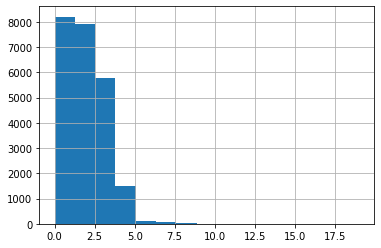

In [24]:
# Переходим к числу комнат
df['rooms'].hist(bins=15)
print(df['rooms'].min())
print(df['rooms'].max())
# Ноль комнат - это как? 19 комнат тоже немного смущает

In [25]:
# Посмотрим на эти значения поближе
df.loc[(df['rooms'] == 19)] 
# Всего одна строка. Не жалко
df = df.drop(df.loc[(df['rooms'] == 19)].index)
# Теперь посмотрим на нули. Может это студии так обозначают?
df.loc[(df['rooms'] == 0)].groupby(['studio'])['rooms'].count()
# Не похоже, большая часть и правда студии, но еще есть 58 строк. 
# К тому же, а как проставлены остальные студии в выборке? Сделаем обратную группировку
df.loc[(df['studio'] == True)].groupby(['rooms'])['rooms'].count()
# Все-таки 0 комнат это студии, но иногда их все-таки помечают как однокомнатные
# Ну и взглянем на объекты с нулем комнат и не являющеся студиями
df.loc[(df['rooms'] == 0)&((df['studio'] == False))]
# Все ясно - это открытая планировка
# Не будем чистить или заменять нули,
# их немного и они показывают наличия в выборки студий или квартир с открытой планировкой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,living/total,kitchen/total,floor_category,day_of_week,month,year
349,4,2320000,25.00,2017-09-27,0,nan,14.00,17.00,1,False,False,True,nan,0,деревня Кудрово,nan,nan,nan,nan,nan,nan,45.00,"92,800.00",0.68,nan,первый,Wednesday,September,2017
508,0,3375000,34.40,2017-03-28,0,nan,26.00,24.30,19,False,False,True,nan,1,Парголово,"53,115.00","19,292.00",0.00,nan,1.00,593.00,430.00,"98,110.47",0.71,nan,другой,Tuesday,March,2017
780,9,2600000,26.10,2018-02-20,0,nan,18.00,nan,8,False,False,True,nan,1,Мурино,nan,nan,nan,nan,nan,nan,45.00,"99,616.86",nan,nan,другой,Tuesday,February,2018
839,14,1900000,35.00,2017-04-14,0,2.70,5.00,15.00,3,False,False,True,nan,1,Новый Свет,nan,nan,nan,nan,nan,nan,7.00,"54,285.71",0.43,nan,другой,Friday,April,2017
946,5,2200000,23.00,2016-09-27,0,nan,27.00,18.00,7,False,False,True,nan,2,Мурино,nan,nan,nan,nan,nan,nan,483.00,"95,652.17",0.78,nan,другой,Tuesday,September,2016
1574,0,2200000,22.00,2017-11-03,0,nan,18.00,15.00,16,False,False,True,nan,1,деревня Кудрово,nan,nan,nan,nan,nan,nan,81.00,"100,000.00",0.68,nan,другой,Friday,November,2017
1625,7,1980000,23.98,2018-02-01,0,nan,4.00,10.50,3,False,False,True,nan,1,станции Корнево,nan,nan,nan,nan,nan,nan,120.00,"82,568.81",0.44,nan,другой,Thursday,February,2018
2532,5,3500000,27.10,2018-02-01,0,nan,18.00,18.70,9,False,False,True,nan,2,Санкт-Петербург,"32,036.00","8,175.00",0.00,nan,1.00,644.00,70.00,"129,151.29",0.69,nan,другой,Thursday,February,2018
3019,18,2100000,24.00,2017-11-10,0,nan,10.00,18.00,6,False,False,True,nan,2,Сертолово,nan,nan,nan,nan,nan,nan,5.00,"87,500.00",0.75,nan,другой,Friday,November,2017
4115,7,2600000,24.00,2018-02-01,0,nan,25.00,18.00,4,False,False,True,nan,2,Санкт-Петербург,"10,031.00","13,330.00",1.00,915.00,0.00,nan,42.00,"108,333.33",0.75,nan,другой,Thursday,February,2018


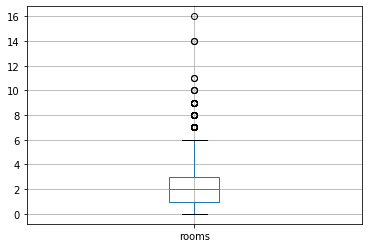

In [26]:
# Посмотрим, есть ли еще критичные выбросы
df.boxplot(column='rooms')
# 14 и 16 явно выбиваются. Попробуем без них
df.loc[(df['rooms'] > 12)] 
# Три строки с такими значениями
df = df.drop(df.loc[(df['rooms'] > 13)].index)

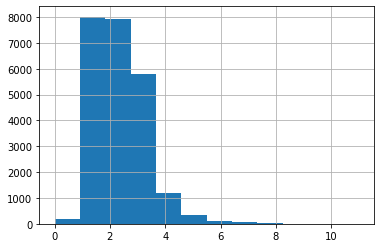

In [27]:
# Попробуем посмотреть еще раз на распределение
df['rooms'].hist(bins=12)
# Получили красивую гистограмму

In [28]:
# Все очевидно, но все же добавим цифр
df['rooms'].describe()

count   23,616.00
mean         2.07
std          1.06
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64

Итого в выборке имеется небольшое число студий и квартир с большим количеством комнат. Среднее число комнат очень близко к медиане - 2. По квартильному размаху число комнат лежит от одной до трех

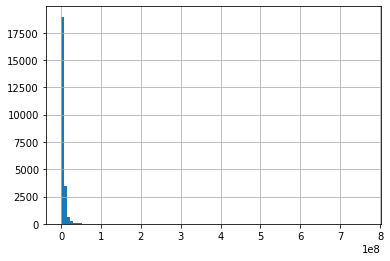

In [29]:
# Посмотрим на цену. Пропусков также нет
df['last_price'].hist(bins=100)
# Уже по гистограмме видно очень большой выброс

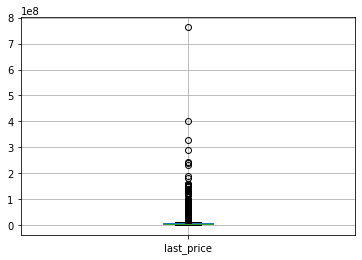

In [30]:
# Наглядно видим выброс очень сильно выбивающийся из всех
df.boxplot(column='last_price')

In [31]:
df.loc[(df['last_price'] > 700000000)] 
# Очень высокая цена - видимо объект очень особенный. Значит можно выбросить 
df = df.drop(df.loc[(df['last_price'] > 700000000)] .index)

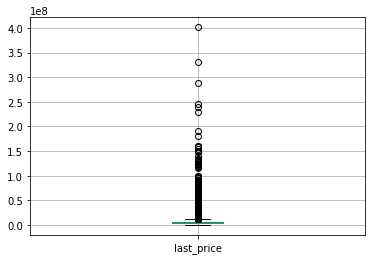

In [32]:
# Не хочется удалять много лишнего, но все еще сильно выбиваются квартиры с ценами больше 100000000
# Они будут сильно влиять на среднюю цену и смещать гистограмму
df.boxplot(column='last_price')
df.loc[(df['last_price'] > 100000000)] 
# Избавимся от них
df = df.drop(df.loc[(df['last_price'] > 100000000)] .index)

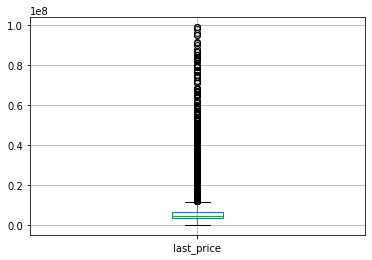

In [33]:
df.boxplot(column='last_price')
# Все еще видно большой "хвост", 
# но не будем увлекаться удалением - такая анамалия особенность выборки и не нужно ее скрывать

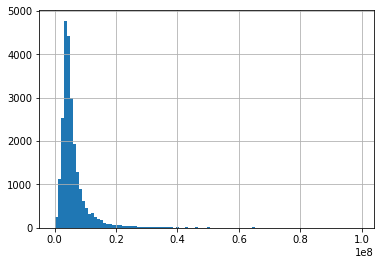

In [34]:
df['last_price'].hist(bins=100)
# Теперь распределение приблизилось к распределению Пирсона, так же как и площадь, что и должно было быть
# Очевидно, что стоимость и площадь должны быть распределенны схоже
# Также имеется "правый хвост"

In [35]:
df['last_price'].describe()

count       23,583.00
mean     6,245,000.04
std      6,413,080.14
min         12,190.00
25%      3,400,000.00
50%      4,620,000.00
75%      6,750,000.00
max     99,000,000.00
Name: last_price, dtype: float64

По ценам получили вполне ожидаемые результаты. Средняя стоимость квартиры 6,2 миллиона, но так как в выборке большой хвост, то лучше выборку характерезует не среднее, а медиана - 4,6 миллиона. По квартильному размаху цена лежит от 3,4 млн до 6,8 млн. 

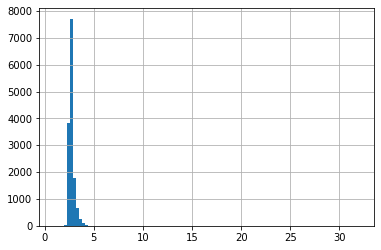

In [36]:
# Посмотрим на высоту потолков
df['ceiling_height'].hist(bins=100)
# Смущают слишком высокие и слишком низкие потолки. Так же помним,что по этом столбцу было большое количество пропусков

In [37]:
# Посмотрим на пропуски
df[df['ceiling_height'].isnull()].count()[0]
# Таких строк достаточно много - 9142. Можно предположить, что потолки в этих объектах не измерялись
# Не каждый продавец знает высоту потолков своего объекта продажи, и может не иметь возможности или желания его измерять

9142

Попробуем заполнить пропуски по высоте потолков. Высота потолков зависит от типа дома, его этажности, 
так современные здания имеют более высокие потолки, чем старые девитиэтажки.
Так же можнно предположить, что имееются существенные различия в населенных пунктах. 
Деревенские дома, вероятно отличаются от городских по высоте потолков. 
Поэтому для заполнения пропусков используем среднюю высоту потолков сгруппировки по городу и этажности дома.
Но для начала обратим внимание на выбросы. 
Сначала рассмотрим выбросы с точки зрения логики. Могут ли реальные потолки быть такой высотой?
Согласно строительным рекомендациям высота потолка не может быть меньше 2,4 метра, верхний параметр отсутствует, однако по данным сайта недвижимости редко достигает более 10 метров в элитных пентхаусах. Возмем эти значения за критерии.

In [38]:
# Сначала посмотрим на выбросы по высоте потолков
print(df.loc[(df['ceiling_height'] <2.4)].count()[0])
print(df.loc[(df['ceiling_height'] > 10)].count()[0])
# Удаляем
df = df.drop(df.loc[(df['ceiling_height'] > 10)].index)
df = df.drop(df.loc[(df['ceiling_height'] < 2.4)].index)
# Теперь можно заполнить средним значением
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['locality_name','floors_total'])['ceiling_height'].transform('mean'))
df[df['ceiling_height'].isnull()].count()[0]
# Осталось некоторое количество пропусков

21
24


349

count   23,189.00
mean         2.73
std          0.25
min          2.40
25%          2.57
50%          2.70
75%          2.80
max          8.30
Name: ceiling_height, dtype: float64

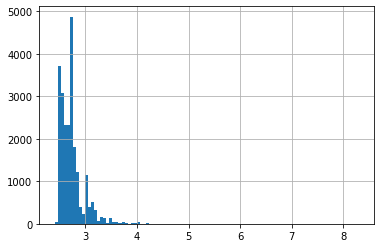

In [39]:
# Посмотрим, что получилось
df['ceiling_height'].hist(bins=100)
df['ceiling_height'].describe()
# Вполне неплохо

Высота потолков вполне предсказуема в квартильном размахе находиться от 2,57 до 2,8 метров. Среднее и медианной значение приближенно равны - 2,7 метра

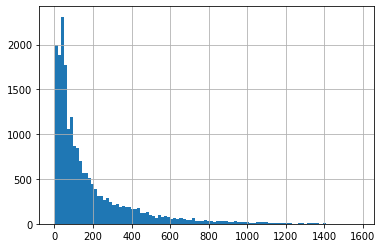

In [40]:
# Переходим к времени продажи квартиры
df['days_exposition'].hist(bins=100)
# В целом ожидаемый график. 
# Как мы помним, в данных еще есть пропуски, но у нас нет возможности их заполнить

count   20,375.00
mean       180.58
std        219.61
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

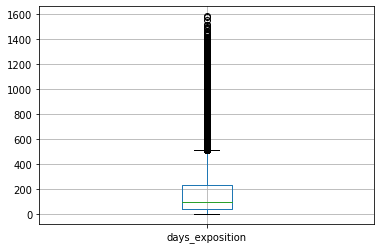

In [41]:
# Когда продажи прошли очень быстро, а когда очень медленно?
df.boxplot(column='days_exposition')
df['days_exposition'].describe()

По боксплоту можем видеть очень большое количество выбросов сверху.
В среднем продажа объекта занимает от 45 до 231 дня. Менее 45 дней - это быстрая продажа, однако даже минимальная скорость продажи в 1 день не сильно выбивается из выборки. А вот максимальные продажи имееют гораздо больший разброс до 1580 дней - это больше четырех лет! Очень много, учитывая, что очень медленные продажи уже можно считать более 500 дней. Но это, все же закономерность, которая характеризует выборку. Это показывает, что есть квартиры которое продаются очень долго, более года. 
Это вполне ожидаемо, для квартир комфорт класса и выше, или каких-либо особенных предложений.

In [42]:
# Посмотрим на взаимосвязь факторов
# Сначала отберем только нужные столбцы (числовые, для нечисловых посмотрим ниже)
df_for_corr = df[['last_price','total_area', 'rooms','cityCenters_nearest','year']]
df_for_corr.corr()

,last_price,total_area,rooms,cityCenters_nearest,year
last_price,1.00,0.77,0.47,-0.30,-0.05
total_area,0.77,1.00,0.77,-0.23,-0.08
rooms,0.47,0.77,1.00,-0.18,-0.05
cityCenters_nearest,-0.30,-0.23,-0.18,1.00,0.03
year,-0.05,-0.08,-0.05,0.03,1.00


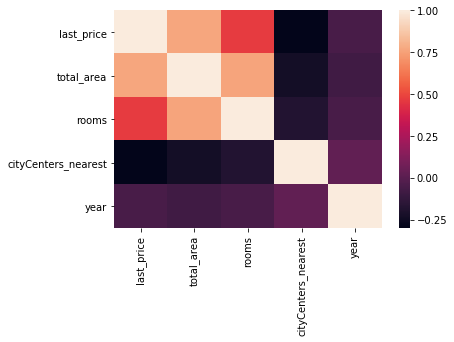

In [43]:
# Добавим красок
sns.heatmap(df_for_corr.corr())

На цену больше всего влияет площадь - коэффициент корреляции составил 0,7689, затем число комнат - 0,4701. Чем больше площадь и число комна, тем выше стоимость квартиры. Чуть меньшее влияние оказывает близость от центра - коэффициент корреляции отрицательный - -0,3003. Чем меньше расстояние от центра, тем выше цена. Год оказывает малозначительное влияние. Все эти выводы можно наглядно подтвердить глядя на графики ниже 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e0f90f3d0>,
      dtype=object)

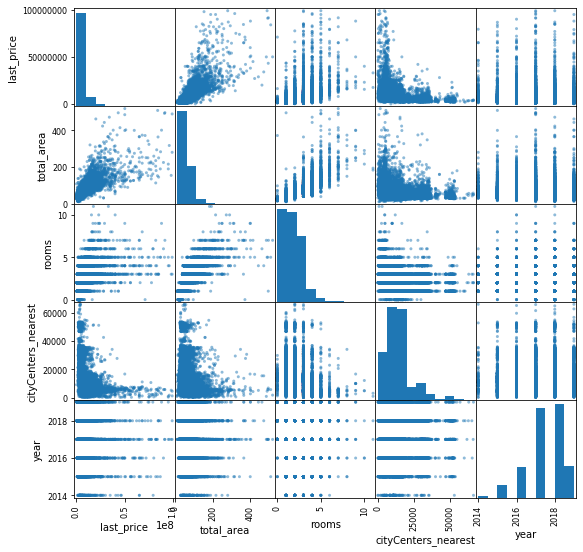

In [44]:
pd.plotting.scatter_matrix(df_for_corr, figsize=(9, 9)) 

Посмотрим как цену квартиры влияют нечисловые данные. Такие как категория этажности квартиры, день недели и месяц. Для этого сравним распределение цены по этим показателям

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


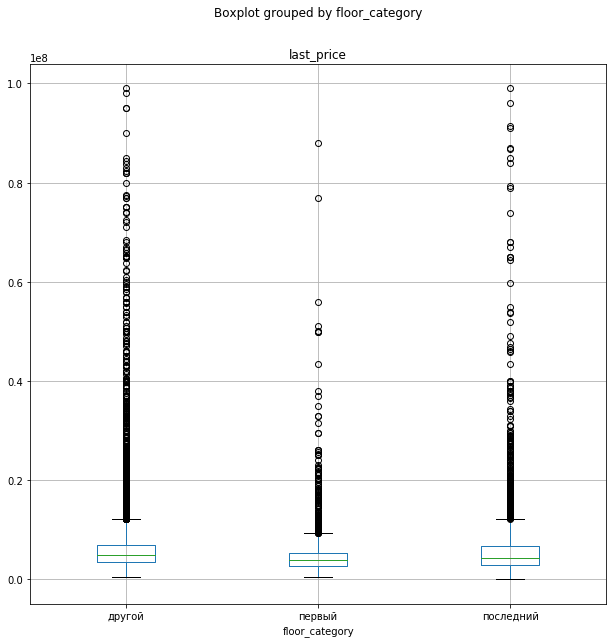

In [45]:
plot = df.boxplot('last_price', by='floor_category',figsize=(10,10))
# В квартирах на первых этажах реже встречаются выбросы с высокой ценой. 
# Различия между последним этажом и другими не так существенны, но выбросов для последнего этажа меньше

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


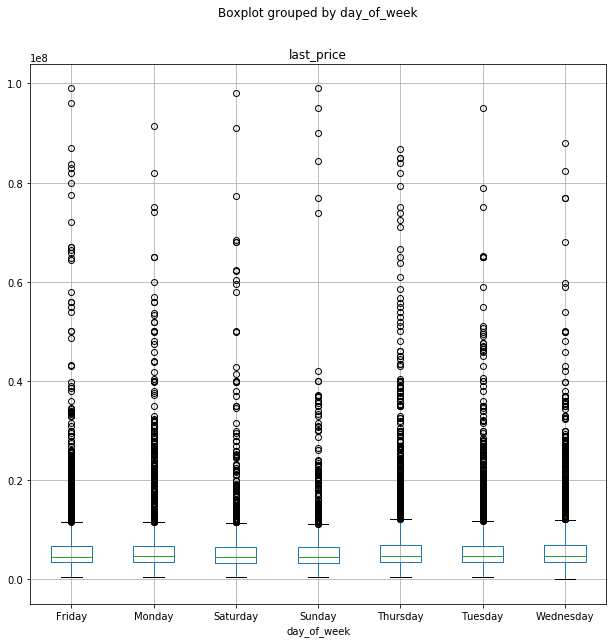

In [46]:
plot = df.boxplot('last_price', by='day_of_week',figsize=(10,10))
# Обоснованных закономерностей нет

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


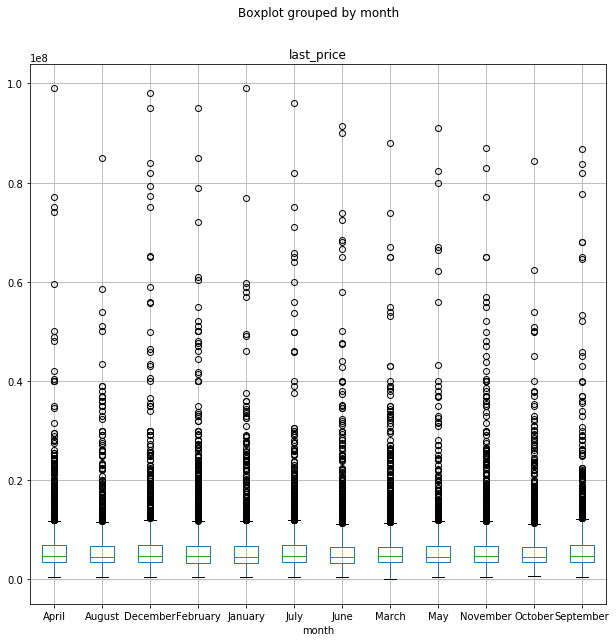

In [47]:
plot = df.boxplot('last_price', by='month',figsize=(10,10))
# Предпологаем различия в распределениях случайными

Выберите 10 населённых пунктов с наибольшим числом объявлений. 
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [48]:
# Сгруппируем данные с помощью сводной таблицы
df_10 = df.pivot_table(
    index='locality_name', values=['last_price','price_for_m'], aggfunc={'last_price':'count', 'price_for_m':'mean'}
)                                                          
# Сортируем и берем 10 населённых пунктов с наибольшим числом объявлений.
df_10 = df_10.sort_values(by=['last_price'],ascending=False).head(10)
df_10
# Самая высокая стоимость жилья в итоговой таблице за кв. метр - ожидаемо в Санкт-Петербурге
# Самая низкая стоимость жилья среди городов итоговой таблицы за кв метр - в Выборге

,last_price,price_for_m
locality_name,,
Санкт-Петербург,15642,"113,576.19"
Мурино,585,"86,039.84"
Шушары,440,"78,677.36"
Всеволожск,397,"68,719.32"
Пушкин,369,"103,125.82"
Колпино,338,"75,424.58"
Парголово,327,"90,175.91"
Гатчина,306,"68,757.68"
деревня Кудрово,298,"92,493.64"


Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name')

In [49]:
# Создаем столбец с расстоянием в километрах
df_for_centre = df.loc[(df['locality_name'] == 'Санкт-Петербург')]
df_for_centre['centre_km'] = df_for_centre['cityCenters_nearest']/1000
df_for_centre['centre_km'] = df_for_centre['centre_km'].round(decimals=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


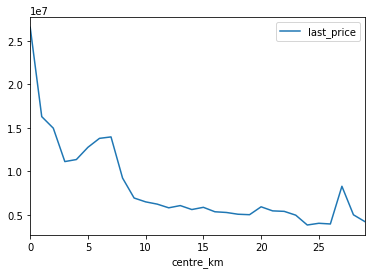

In [50]:
# Находим среднюю стоимость для каждого километра
df_for_centre.pivot_table(
    index='centre_km', values='last_price', aggfunc = 'mean'
).plot()   
# Как и предподогалась квартиры дальше от центра дешевле

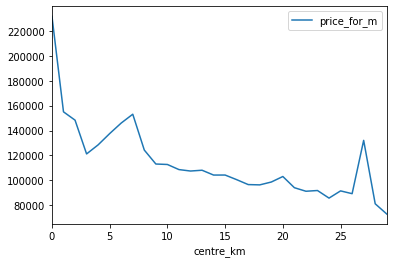

In [51]:
# Может для стоимости квадратного метра это будет очевиднее
df_for_centre.pivot_table(
    index='centre_km', values='price_for_m', aggfunc = 'mean'
).plot()  
# Чуть более сглажен, но различия не существенны.
# Считаем центр в границах 1-3 км

In [52]:
# Выделяем данные по центру
df_centre = df_for_centre.loc[(df_for_centre['centre_km']< 4)]
df_centre

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,living/total,kitchen/total,floor_category,day_of_week,month,year,centre_km
24,8,6500000,97.20,2015-10-31,2,3.08,3.00,46.50,1,False,False,False,19.60,0,Санкт-Петербург,"20,052.00","2,336.00",3.00,411.00,3.00,124.00,265.00,"66,872.43",0.48,0.20,первый,Saturday,October,2015,2.00
99,32,9600000,90.00,2017-09-26,4,2.82,5.00,67.00,2,False,False,False,8.00,0,Санкт-Петербург,"23,277.00","2,818.00",0.00,nan,0.00,nan,104.00,"106,666.67",0.74,0.09,другой,Tuesday,September,2017,3.00
138,8,4800000,40.00,2017-11-18,2,3.08,3.00,29.00,2,False,False,False,6.00,0,Санкт-Петербург,"23,371.00","2,913.00",0.00,nan,2.00,729.00,80.00,"120,000.00",0.72,0.15,другой,Saturday,November,2017,3.00
154,1,8200000,80.00,2018-11-06,3,4.15,3.00,44.20,2,False,False,False,12.20,0,Санкт-Петербург,"20,562.00","3,167.00",2.00,344.00,1.00,838.00,38.00,"102,500.00",0.55,0.15,другой,Tuesday,November,2018,3.00
155,8,96000000,317.00,2017-07-07,4,3.50,3.00,183.00,3,False,False,False,nan,1,Санкт-Петербург,"22,673.00","1,771.00",2.00,508.00,3.00,366.00,62.00,"302,839.12",0.58,nan,последний,Friday,July,2017,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,18,5260000,38.00,2018-11-06,1,3.30,5.00,16.00,1,False,False,False,12.00,0,Санкт-Петербург,"24,675.00","3,441.00",2.00,538.00,1.00,466.00,12.00,"138,421.05",0.42,0.32,первый,Tuesday,November,2018,3.00
23449,4,6300000,52.60,2015-05-28,3,3.25,5.00,29.80,2,False,False,False,8.70,0,Санкт-Петербург,"22,460.00","3,400.00",2.00,218.00,3.00,69.00,505.00,"119,771.86",0.57,0.17,другой,Thursday,May,2015,3.00
23555,5,15350000,158.50,2019-03-07,7,2.95,7.00,57.40,7,False,False,False,12.40,1,Санкт-Петербург,"23,546.00","3,088.00",1.00,347.00,0.00,nan,nan,"96,845.43",0.36,0.08,последний,Thursday,March,2019,3.00
23602,0,8700000,73.00,2019-01-23,3,2.65,4.00,nan,4,False,False,False,nan,0,Санкт-Петербург,"20,415.00","2,345.00",2.00,57.00,3.00,151.00,34.00,"119,178.08",nan,nan,последний,Wednesday,January,2019,2.00


In [53]:
# Это пригодится для сравнения с центром. Показатели по всем квартирам в Питере
df_for_centre[['last_price','total_area', 'rooms','ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,"15,642.00","15,642.00","15,642.00","15,641.00"
mean,"7,623,205.18",64.06,2.16,2.76
std,"7,346,454.71",37.16,1.11,0.26
min,"12,190.00",12.00,0.00,2.40
25%,"4,200,000.00",41.90,1.00,2.57
50%,"5,500,000.00",55.00,2.00,2.72
75%,"8,100,000.00",74.30,3.00,2.82
max,"99,000,000.00",517.00,11.00,8.30


In [54]:
# Посмотрим на параметры для квартир в центре
df_centre[['last_price','total_area', 'rooms','ceiling_height']].describe()
# Средняя цена квартир в центре 12,8 милионов, в то время как по всем квартирам в Питере цена ниже - 7,6 миллиона.
# Средняя площаль также выше в центре 93 метра против 64. 
# Число комнат в центре в среднем выше на одну - три против двух вне центра
# Высота потолков отличается незначительно, но вссе-таки немного выше в центре - 3,11 метра против 2,77 вне его

,last_price,total_area,rooms,ceiling_height
count,866.00,866.00,866.00,866.00
mean,"14,058,288.17",96.79,3.09,3.14
std,"13,991,693.56",54.07,1.44,0.34
min,"2,100,000.00",12.00,0.00,2.50
25%,"7,261,750.00",63.08,2.00,2.90
50%,"9,625,000.00",84.15,3.00,3.12
75%,"14,687,500.00",114.80,4.00,3.30
max,"99,000,000.00",517.00,11.00,5.80


            last_price  rooms  floor  centre_km
last_price        1.00   0.37   0.18      -0.20
rooms             0.37   1.00   0.14      -0.05
floor             0.18   0.14   1.00       0.04
centre_km        -0.20  -0.05   0.04       1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e0f2b0610>,
      dtype=object)

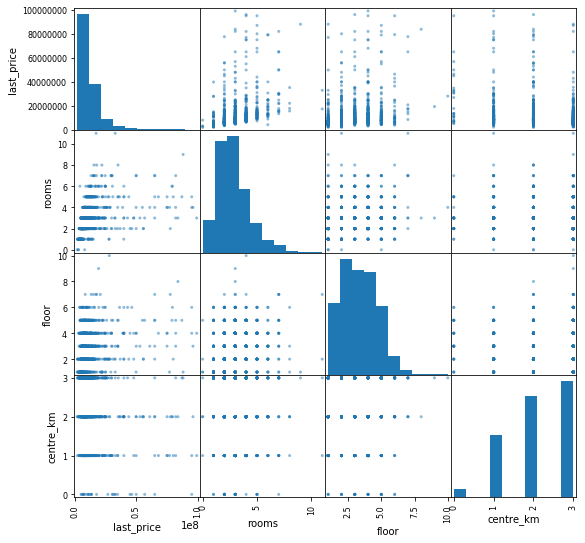

In [55]:
# Что влияет на цены
df_centre_corr = df_centre[['last_price','rooms','floor','centre_km','first_day_exposition']]
print(df_centre_corr.corr())
pd.plotting.scatter_matrix(df_centre_corr, figsize=(9, 9)) 
# Аналогично со всеми квартирами, по квартирам в центре можно наблядать следующие закономерности:
# Чем больше число комнат, тем дороже
# Чем выше этаж, тем дороже квартира, но не слишком значительно
# И чем ближе к центру, тем дороже квартира

## Общий вывод

По имеющимся данным можно сделать следующие выводы:
1) В данных присутствует информация о недвижимости среднего уровня, так же имеется часть данных по элитным объектам
2) В данных присутствует много пропусков, особенно по таким показателям как близость парков, водоемов, аэропорта
(возможно это можно настроить автоматически)
3) Самая дорогая недвижимость в Питербурге, а дешевая в Выборге (по учету только 10 городов с большим числом объявлений)
4) Квартиры в центре Петербурга в среднем дороже и просторнее, чем за его пределами